In [1]:
%pylab inline
from app.analysis import Quote
large = Quote.screen_funds('Equities', 'Domestic', 'Large-Cap')
mid = Quote.screen_funds('Equities', 'Domestic', 'Mid-Cap')
small = Quote.screen_funds('Equities', 'Domestic', 'Small-Cap')
print(len(large), len(mid), len(small))
quote = Quote(large + mid + small, 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
77 19 20
from 2019-01-29 to 2019-07-29 - 116


In [2]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

116


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
QQQ,122,0.135168,0.399602,0.318395,20.941554,10.983212
IWP,122,0.133895,0.347258,0.362724,19.732652,6.491853
VUG,122,0.133066,0.337026,0.371276,20.357438,8.023383
MGK,122,0.132843,0.346129,0.360867,20.528618,8.647441
MTUM,122,0.128557,0.274810,0.438923,19.588806,2.859384
VONG,122,0.126900,0.338401,0.351545,19.411294,7.928632
IWF,122,0.126596,0.337609,0.351471,19.453921,7.883790
IWY,122,0.125596,0.340789,0.345256,19.390292,8.194247
VOT,122,0.125563,0.314970,0.373453,18.437648,5.627906


evicted XMLV 0.879 0.583
evicted DIA 0.891 0.673
evicted SPYG 0.844 0.658
evicted DVY 0.809 0.790
evicted XSLV 0.667 0.667
retry backlogs ['VV', 'MGC', 'IVE', 'SPLG', 'VTV', 'IWV', 'IWB', 'OEF', 'GSLC', 'VO', 'VBK', 'RSP', 'MDY', 'PRF', 'VOO', 'DLN', 'IWP', 'SCHB', 'SPLV', 'VOE', 'VUG', 'SPY', 'IWR', 'IWM', 'IVW', 'IWY', 'IJT', 'SLY', 'SCHX', 'IVV', 'VIOO', 'ITOT', 'SPYV', 'QDF', 'VONG', 'SPTM', 'SCHV', 'VTI', 'VONV', 'IJK', 'QUAL', 'JHML', 'SDY', 'IJH', 'VOOV', 'VXF', 'IJS', 'VIG', 'SCHA', 'MGK', 'VB', 'IVOO', 'VOOG', 'IUSG', 'XLG', 'SCHK', 'IYY', 'RPV', 'IWF', 'IWN', 'IJJ', 'MDYV', 'SPMD', 'IJR', 'SCHG', 'FNDX', 'LRGF', 'RPG', 'PRFZ', 'MGV', 'IWD', 'MTUM', 'SCHM', 'NOBL', 'DGRO', 'IUSV', 'DGRW', 'TILT', 'VONE', 'QQQ', 'SPHQ', 'FV', 'EZM', 'MDYG', 'IWO', 'HDV', 'VYM', 'VTWO', 'SPSM', 'VBR', 'IWS', 'SPHD', 'DHS', 'JKD', 'DON', 'SPYD', 'DES', 'FNDA', 'VOT', 'SDOG', 'ONEQ', 'JKE', 'RDIV', 'DTN', 'SLYV', 'SLYG', 'CFO', 'VLUE', 'RWL', 'SCHD'] at 0.905/-0.51 - 0.512
evicted RDIV 0.895 0.716

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
USMV,122.0,0.122502,0.223792,-0.355133,0.008468,0.096222,0.250164,0.844584,0.511927,18.159762,2.180427
Portfolio,122.0,0.122502,0.223792,-0.355133,0.008468,0.096222,0.250164,0.844584,0.511927,18.159762,2.180427


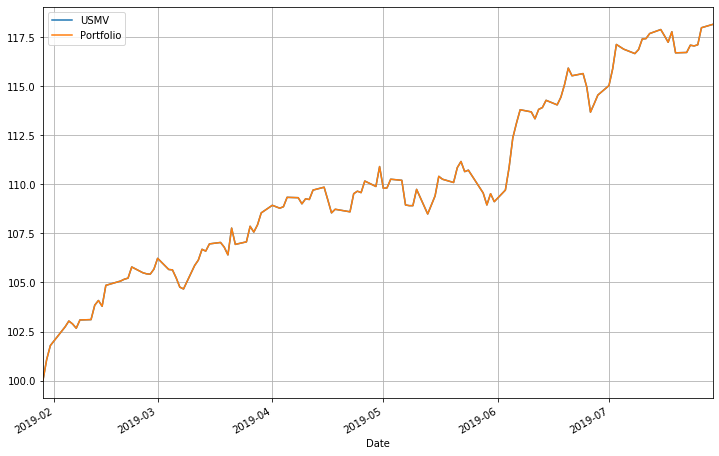

In [3]:
bounds = .10, .14
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(_lambda=1, bounds=bounds)
quote.setup_mask(['USMV'])
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)